# FHIR-Aggregator
## Explore data in the test google fhir service

### install and test dependencies

In [1]:
pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 35.5 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=

# install the query tool

In [3]:
pip install git+https://github.com/FHIR-Aggregator/fhir-query.git

  Cloning https://github.com/FHIR-Aggregator/fhir-query.git to /tmp/pip-req-build-fbiwv6ak
  Running command git clone --filter=blob:none --quiet https://github.com/FHIR-Aggregator/fhir-query.git /tmp/pip-req-build-fbiwv6ak
  Resolved https://github.com/FHIR-Aggregator/fhir-query.git to commit 0358fc754a44d9ae55fd16575e5a314dc8c1917d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.3 MB/s eta 0:00:00
  Created wheel for fhir_query: filename=fhir_query-0.1.0-py3-none-any.whl size=21448 sha256=113a26fbb387e07b1213b4e64e23c8e0ad23771aba71e493f8b4dfb785caf99c
  Stored in dire

# verify the tool was installed

In [4]:
!fq

Usage: fq [OPTIONS] COMMAND [ARGS]...

  Run FHIR GraphDefinition traversal.

Options:
  --help  Show this message and exit.

Commands:
  main*       Run FHIR GraphDefinition traversal.
  dataframe   Create dataframes from the local db.
  summarize   Summarize the aggregation results.
  visualize   Visualize the aggregation results.
  vocabulary  Retrieve Vocabulary Observation and ResearchStudy resources...


# retrieve vocabularies used on commonly used resources

In [5]:
%env FHIR_BASE=https://google-fhir.test-fhir-aggregator.org
!fq vocabulary vocabulary.tsv --fhir-base-url $FHIR_BASE

env: FHIR_BASE=https://google-fhir.test-fhir-aggregator.org
✔ Wrote 155 vocabularies to vocabulary.tsv


### show vocabularies

In [10]:
import pandas as pd
import dtale.app as dtale_app
import dtale
df = pd.read_csv('vocabulary.tsv', sep='\t')
dtale_app.USE_COLAB = True
dtale.show(df)

https://zuqdi8bb94-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

# retrieve a pre-defined set of queries, a GraphDefinition
## in this case, retrieve an entire study

In [27]:
!wget https://raw.githubusercontent.com/FHIR-Aggregator/fhir-query/refs/heads/main/graph-definitions/R5/ResearchStudyGraph.yaml


--2025-02-11 23:24:35--  https://raw.githubusercontent.com/FHIR-Aggregator/fhir-query/refs/heads/main/graph-definitions/R5/ResearchStudyGraph.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1840 (1.8K) [text/plain]
Saving to: ‘ResearchStudyGraph.yaml.2’

ResearchStudyGraph. 100%[===================>]   1.80K  --.-KB/s    in 0s      

2025-02-11 23:24:36 (25.0 MB/s) - ‘ResearchStudyGraph.yaml.2’ saved [1840/1840]



# export the data to a local database

In [28]:
%env  FHIR_BASE=https://google-fhir.test-fhir-aggregator.org
# export a study using a set of stored queries
!fq --fhir-base-url $FHIR_BASE  --graph-definition-file-path  ResearchStudyGraph.yaml  --path '/ResearchStudy?identifier=TCGA-KIRC'

env: FHIR_BASE=https://google-fhir.test-fhir-aggregator.org
research-study-graph is valid FHIR R5 GraphDefinition
✔ Fetching https://google-fhir.test-fhir-aggregator.org/ResearchStudy?identifier=TCGA-KIRC
✔ Processing link: ResearchSubject/study={path} with 1 ResearchStudy(s)
✔ Processing link: Group/part-of-study={path}&_count=1000&_total=accurate with 1 ResearchStudy(s)
✔ Processing link: Patient/part-of-study={path}&_count=1000&_total=accurate with 1 ResearchStudy(s)
✔ Processing link: Specimen/part-of-study={path}&_count=1000&_total=accurate with 1 ResearchStudy(s)
✔ Processing link: Observation/part-of-study={path}&_count=1000&_total=accurate with 1 ResearchStudy(s)
✔ Processing link: Procedure/part-of-study={path}&_count=1000&_total=accurate with 1 ResearchStudy(s)
✔ Processing link: DocumentReference/part-of-study={path}&_count=1000&_total=accurate with 1 ResearchStudy(s)
⠹ Processing link: ServiceRequest/part-of-study={path}&_count=1000&_total=accurate with 1 Rese (...)

/usr/local/lib/python3.11/dist-packages/dtale/column_analysis.py:402: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



⠹ Processing link: ServiceRequest/part-of-study={path}&_count=1000&_total=accurate with 1 Rese (...)

/usr/local/lib/python3.11/dist-packages/dtale/column_analysis.py:511: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



⠋ Processing link: ServiceRequest/part-of-study={path}&_count=1000&_total=accurate with 1 Rese (...)

/usr/local/lib/python3.11/dist-packages/dtale/column_analysis.py:402: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



⠧ Processing link: ServiceRequest/part-of-study={path}&_count=1000&_total=accurate with 1 Rese (...)

/usr/local/lib/python3.11/dist-packages/dtale/column_analysis.py:402: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



✔ Processing link: ServiceRequest/part-of-study={path}&_count=1000&_total=accurate with 1 ResearchStudy(s)
✔ Processing link: ImagingStudy/part-of-study={path}&_count=1000&_total=accurate with 1 ResearchStudy(s)
✔ Processing link: Condition/part-of-study={path}&_count=1000&_total=accurate with 1 ResearchStudy(s)
✖ Could not find any resources for MedicationAdministration->Medication link: {'params': '_id={path}&_count=1000&_total=accurate', 'path': 'MedicationAdministration.medication.reference.reference', 'sourceId': 'MedicationAdministration', 'targetId': 'Medication'}
Aggregated Results: {'Condition': 537, 'DocumentReference': 29352, 'Group': 16, 'ImagingStudy': 2177, 'MedicationAdministration': 1074, 'Observation': 27286, 'Patient': 537, 'Procedure': 1616, 'ResearchStudy': 1, 'ResearchSubject': 537, 'ServiceRequest': 27163, 'Specimen': 17121}
database available at: /tmp/fhir-graph.sqlite


In [29]:
# summarize the extracted data
!fq summarize

Condition:
  count: 537
  references:
    Encounter:
      count: 537
    Observation:
      count: 4889
    Patient:
      count: 537
    ResearchStudy:
      count: 537
DocumentReference:
  count: 29352
  references:
    Group:
      count: 16
    Patient:
      count: 29336
    ResearchStudy:
      count: 29352
    ServiceRequest:
      count: 27163
    Specimen:
      count: 35332
Group:
  count: 16
  references:
    Patient:
      count: 8592
    ResearchStudy:
      count: 16
ImagingStudy:
  count: 2177
  references:
    Patient:
      count: 2177
    ResearchStudy:
      count: 2177
    Specimen:
      count: 2177
MedicationAdministration:
  count: 1074
  references:
    Patient:
      count: 1074
    ResearchStudy:
      count: 1074
Observation:
  count: 27286
  references:
    Condition:
      count: 3242
    DocumentReference:
      count: 2375
    Encounter:
      count: 537
    ImagingStudy:
      count: 2177
    Observation:
      count: 3815
    Patient:
      count: 2965

In [31]:
# create a dataframe from  the extracted data
!fq dataframe


Saved /tmp/fhir-graph.tsv
Saved /tmp/fhir-graph.tsv


In [1]:
import pandas as pd
import dtale.app as dtale_app
import dtale
df = pd.read_csv('/tmp/fhir-graph.tsv')
dtale_app.USE_COLAB = True
dtale.show(df)

In [ ]:
pip install lifelines

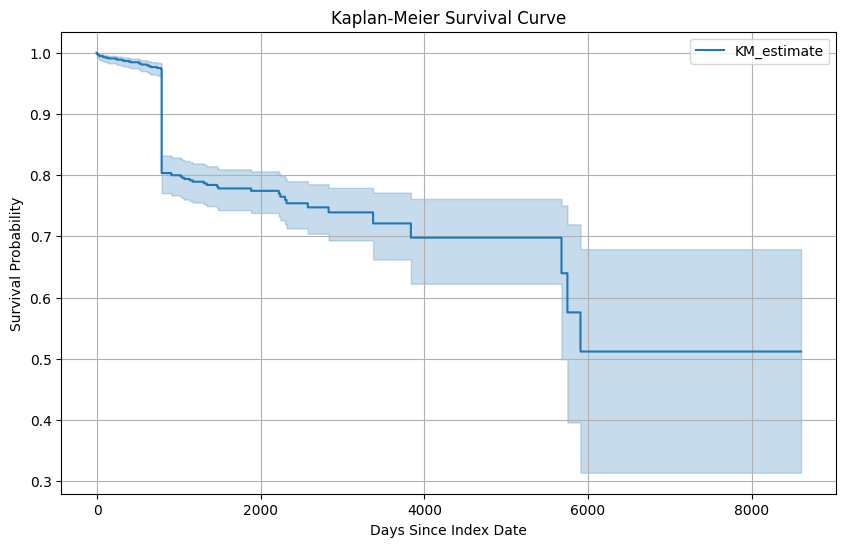

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

df['days_follow_up'] = (
    df['patient_observation_number_of_days_between_index_date_and_last_follow_up']
    .str.replace(' days', '', regex=False)
    .replace('', np.nan) 
    .astype(float)   
)
median_days = df['days_follow_up'].median()
df['days_follow_up'] = df['days_follow_up'].fillna(median_days).astype(int) # Shortened column name and converted values to int days

df_unique = df.drop_duplicates(subset=['patient_id']) # This is the primary key for a transformed FHIR patient/participant

T = df_unique['days_follow_up']
E = df_unique['patient_deceasedBoolean'].astype(bool) 

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Days Since Index Date')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()
